In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string


In [2]:
data = pd.read_csv('D:\TA2\data_set.csv',encoding= 'unicode_escape', sep=';')
data

,content,datetime,tags,title
0,Kapten Supardi Nasir berharap Kompetisi Liga ...,"1,59E+12","Persib Bandung,Persib,Supardi Nasir,Liga 1",\r\n\t\t\t\t\t\t\tKapten Persib Bandung Harapk...
1,Borussia Moenchengladbach menyodok ke peringk...,"1,59E+12","Bundesliga,Borussia Moenchengladbach,Liga Jerman","\r\n\t\t\t\t\t\t\tBundesliga, Borussia Moenche..."
2,"Gelandang incaran , Saul Niguez, memberi siny...","1,59E+12","Manchester United,Saul Niguez,Atletico Madrid,...",\r\n\t\t\t\t\t\t\tSaul Beri Sinyal Tinggalkan ...
3,"Joshua Denson, seorang dokter, mengungkap pen...","1,59E+12","Paru-paru,Corona,COVID-19,SARS-CoV-2,Protein ACE2","\r\n\t\t\t\t\t\t\tTak Cuma di Paru-paru, Ini G..."
4,Sebanyak 46 lokasi di Jakarta disemprot cairan...,"1,59E+12","disinfektan,Damkar ,Corona","\r\n\t\t\t\t\t\t\tCegah Corona, 46 Lokasi di J..."
...,...,...,...,...
1010,",  Polisi anti-huru hara berjaga di sejuml...","1,59E+12","Hong Kong,Cina,Lagu kebangsaan,Demonstrasi",\r\n\t\t\t\t\t\t\tPolisi Hong Kong Berjaga di ...
1011,Kementerian Pekerjaan Umum dan Perumahan Raky...,"1,59E+12","Piala Dunia U-20,PSSI,Kementerian PUPR,stadion...",\r\n\t\t\t\t\t\t\tRenovasi Venue Piala Dunia U...
1012,Istana angkat suara soal kabar ditunjuk menj...,"1,59E+12","Ruhut Sitompul,BPIP,Istana",\r\n\t\t\t\t\t\t\tKata Istana tentang Ruhut Si...
1013,Ombudsman DKI Jakarta menyarankan Pemerintah ...,"1,59E+12","New Normal,Ombudsman,Kenormalan Baru ,Pemprov ...",\r\n\t\t\t\t\t\t\tOmbudsman Jakarta Sebut Kons...


In [3]:
data.drop(["datetime"],axis = 1, inplace = True)

In [4]:
data

,content,tags,title
0,Kapten Supardi Nasir berharap Kompetisi Liga ...,"Persib Bandung,Persib,Supardi Nasir,Liga 1",\r\n\t\t\t\t\t\t\tKapten Persib Bandung Harapk...
1,Borussia Moenchengladbach menyodok ke peringk...,"Bundesliga,Borussia Moenchengladbach,Liga Jerman","\r\n\t\t\t\t\t\t\tBundesliga, Borussia Moenche..."
2,"Gelandang incaran , Saul Niguez, memberi siny...","Manchester United,Saul Niguez,Atletico Madrid,...",\r\n\t\t\t\t\t\t\tSaul Beri Sinyal Tinggalkan ...
3,"Joshua Denson, seorang dokter, mengungkap pen...","Paru-paru,Corona,COVID-19,SARS-CoV-2,Protein ACE2","\r\n\t\t\t\t\t\t\tTak Cuma di Paru-paru, Ini G..."
4,Sebanyak 46 lokasi di Jakarta disemprot cairan...,"disinfektan,Damkar ,Corona","\r\n\t\t\t\t\t\t\tCegah Corona, 46 Lokasi di J..."
...,...,...,...
1010,",  Polisi anti-huru hara berjaga di sejuml...","Hong Kong,Cina,Lagu kebangsaan,Demonstrasi",\r\n\t\t\t\t\t\t\tPolisi Hong Kong Berjaga di ...
1011,Kementerian Pekerjaan Umum dan Perumahan Raky...,"Piala Dunia U-20,PSSI,Kementerian PUPR,stadion...",\r\n\t\t\t\t\t\t\tRenovasi Venue Piala Dunia U...
1012,Istana angkat suara soal kabar ditunjuk menj...,"Ruhut Sitompul,BPIP,Istana",\r\n\t\t\t\t\t\t\tKata Istana tentang Ruhut Si...
1013,Ombudsman DKI Jakarta menyarankan Pemerintah ...,"New Normal,Ombudsman,Kenormalan Baru ,Pemprov ...",\r\n\t\t\t\t\t\t\tOmbudsman Jakarta Sebut Kons...


Data Cleaning

In [5]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", str(text))

data['content'] = data['content'].apply(remove_number)

In [6]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", str(text))

data['title'] = data['title'].apply(remove_number)

In [7]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", str(text))

data['tags'] = data['tags'].apply(remove_number)

In [8]:
data.head()

,content,tags,title
0,Kapten Supardi Nasir berharap Kompetisi Liga ...,"Persib Bandung,Persib,Supardi Nasir,Liga",\r\n\t\t\t\t\t\t\tKapten Persib Bandung Harapk...
1,Borussia Moenchengladbach menyodok ke peringk...,"Bundesliga,Borussia Moenchengladbach,Liga Jerman","\r\n\t\t\t\t\t\t\tBundesliga, Borussia Moenche..."
2,"Gelandang incaran , Saul Niguez, memberi siny...","Manchester United,Saul Niguez,Atletico Madrid,...",\r\n\t\t\t\t\t\t\tSaul Beri Sinyal Tinggalkan ...
3,"Joshua Denson, seorang dokter, mengungkap pen...","Paru-paru,Corona,COVID-,SARS-CoV-,Protein ACE","\r\n\t\t\t\t\t\t\tTak Cuma di Paru-paru, Ini G..."
4,Sebanyak lokasi di Jakarta disemprot cairan s...,"disinfektan,Damkar ,Corona","\r\n\t\t\t\t\t\t\tCegah Corona, Lokasi di Jak..."


Case Folding

In [9]:
data['content'] = data['content'].str.lower()


print('Case Folding Result : \n')
print(data['content'].head(5))
print('\n\n\n')

Case Folding Result : 

0    kapten  supardi nasir berharap kompetisi liga ...
1     borussia moenchengladbach menyodok ke peringk...
2     gelandang incaran , saul niguez, memberi siny...
3     joshua denson, seorang dokter, mengungkap pen...
4    sebanyak  lokasi di jakarta disemprot cairan s...
Name: content, dtype: object






In [10]:
data['tags'] = data['tags'].str.lower()


print('Case Folding Result : \n')
print(data['content'].head(5))
print('\n\n\n')

Case Folding Result : 

0    kapten  supardi nasir berharap kompetisi liga ...
1     borussia moenchengladbach menyodok ke peringk...
2     gelandang incaran , saul niguez, memberi siny...
3     joshua denson, seorang dokter, mengungkap pen...
4    sebanyak  lokasi di jakarta disemprot cairan s...
Name: content, dtype: object






In [11]:
data['title'] = data['title'].str.lower()


print('Case Folding Result : \n')
print(data['content'].head(5))
print('\n\n\n')

Case Folding Result : 

0    kapten  supardi nasir berharap kompetisi liga ...
1     borussia moenchengladbach menyodok ke peringk...
2     gelandang incaran , saul niguez, memberi siny...
3     joshua denson, seorang dokter, mengungkap pen...
4    sebanyak  lokasi di jakarta disemprot cairan s...
Name: content, dtype: object






In [12]:
data.head()

,content,tags,title
0,kapten supardi nasir berharap kompetisi liga ...,"persib bandung,persib,supardi nasir,liga",\r\n\t\t\t\t\t\t\tkapten persib bandung harapk...
1,borussia moenchengladbach menyodok ke peringk...,"bundesliga,borussia moenchengladbach,liga jerman","\r\n\t\t\t\t\t\t\tbundesliga, borussia moenche..."
2,"gelandang incaran , saul niguez, memberi siny...","manchester united,saul niguez,atletico madrid,...",\r\n\t\t\t\t\t\t\tsaul beri sinyal tinggalkan ...
3,"joshua denson, seorang dokter, mengungkap pen...","paru-paru,corona,covid-,sars-cov-,protein ace","\r\n\t\t\t\t\t\t\ttak cuma di paru-paru, ini g..."
4,sebanyak lokasi di jakarta disemprot cairan s...,"disinfektan,damkar ,corona","\r\n\t\t\t\t\t\t\tcegah corona, lokasi di jak..."


In [13]:
def remove_text_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\t'," ").replace('\n'," ").replace('\r'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")


In [14]:
data['content'] = data['content'].apply(remove_text_special)

In [15]:
data['title'] = data['title'].apply(remove_text_special)

In [16]:
data['tags'] = data['tags'].apply(remove_text_special)

In [17]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['tags'] = data['tags'].apply(remove_whitespace_LT)

In [18]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['title'] = data['title'].apply(remove_whitespace_LT)

In [19]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['content'] = data['content'].apply(remove_whitespace_LT)

In [20]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['tags'] = data['tags'].apply(remove_singl_char)

In [21]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['title'] = data['title'].apply(remove_singl_char)

In [22]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['content'] = data['content'].apply(remove_singl_char)

Tokenizing

In [23]:
print('Tokenizing Result : \n') 
print(data['content'].head())
print('\n\n\n')

Tokenizing Result : 

0    kapten supardi nasir berharap kompetisi liga s...
1    ?borussia moenchengladbach menyodok ke peringk...
2    ?gelandang incaran , saul niguez, memberi siny...
3    ?joshua denson, seorang dokter, mengungkap pen...
4    sebanyak lokasi di jakarta disemprot cairan se...
Name: content, dtype: object






In [24]:
print('Tokenizing Result : \n') 
print(data['tags'].head())
print('\n\n\n')

Tokenizing Result : 

0             persib bandung,persib,supardi nasir,liga
1     bundesliga,borussia moenchengladbach,liga jerman
2    manchester united,saul niguez,atletico madrid,...
3        paru-paru,corona,covid-,sars-cov-,protein ace
4                           disinfektan,damkar ,corona
Name: tags, dtype: object






In [25]:
print('Tokenizing Result : \n') 
print(data['title'].head())
print('\n\n\n')

Tokenizing Result : 

0    kapten persib bandung harapkan liga kembali be...
1    bundesliga, borussia moenchengladbach naik ke ...
2    saul beri sinyal tinggalkan atletico, ke manch...
3    tak cuma di paru-paru, ini gejala virus corona...
4    cegah corona, lokasi di jakarta disemprot disi...
Name: title, dtype: object






In [26]:
data.head()

,content,tags,title
0,kapten supardi nasir berharap kompetisi liga s...,"persib bandung,persib,supardi nasir,liga",kapten persib bandung harapkan liga kembali be...
1,?borussia moenchengladbach menyodok ke peringk...,"bundesliga,borussia moenchengladbach,liga jerman","bundesliga, borussia moenchengladbach naik ke ..."
2,"?gelandang incaran , saul niguez, memberi siny...","manchester united,saul niguez,atletico madrid,...","saul beri sinyal tinggalkan atletico, ke manch..."
3,"?joshua denson, seorang dokter, mengungkap pen...","paru-paru,corona,covid-,sars-cov-,protein ace","tak cuma di paru-paru, ini gejala virus corona..."
4,sebanyak lokasi di jakarta disemprot cairan se...,"disinfektan,damkar ,corona","cegah corona, lokasi di jakarta disemprot disi..."


Filtering

In [27]:
def filtering(review):
    # Remove @username
    review = re.sub('@[^\s]+', '', review)
    # Remove #tagger
    review = re.sub(r'#([^\s]+)', '', review)
    # Remove angka termasuk angka yang berada dalam string
    # Remove non ASCII chars
    review = re.sub(r'[^\x00-\x7f]', r'', review)
    review = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', review)
    review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
    review = re.sub(r'\\u\w\w\w\w', '', review)
    # Remove simbol, angka dan karakter aneh
    review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", review)
    return review

Stopword

In [28]:
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import MWETokenizer
  
def clean_text(text):
    # tokenize text
    tokenizer = MWETokenizer()
    tokens = tokenizer.tokenize(text.split())
 
    text_clean = []    
    for word in tokens:
        if (word not in stopwords_indonesia): # remove stopword
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            text_clean.append(stem_word)
 
    return text_clean

In [29]:
data['conten_sastrawi'] = data['content'].apply(lambda x: clean_text(x))

In [30]:
data

,content,tags,title,conten_sastrawi
0,kapten supardi nasir berharap kompetisi liga s...,"persib bandung,persib,supardi nasir,liga",kapten persib bandung harapkan liga kembali be...,"[kapten, supardi, nasir, harap, kompetisi, lig..."
1,?borussia moenchengladbach menyodok ke peringk...,"bundesliga,borussia moenchengladbach,liga jerman","bundesliga, borussia moenchengladbach naik ke ...","[borussia, moenchengladbach, sodok, peringkat,..."
2,"?gelandang incaran , saul niguez, memberi siny...","manchester united,saul niguez,atletico madrid,...","saul beri sinyal tinggalkan atletico, ke manch...","[gelandang, incar, , saul, niguez, sinyal, hen..."
3,"?joshua denson, seorang dokter, mengungkap pen...","paru-paru,corona,covid-,sars-cov-,protein ace","tak cuma di paru-paru, ini gejala virus corona...","[joshua, denson, dokter, ungkap, alam, periksa..."
4,sebanyak lokasi di jakarta disemprot cairan se...,"disinfektan,damkar ,corona","cegah corona, lokasi di jakarta disemprot disi...","[lokasi, jakarta, semprot, cair, serentak, tug..."
...,...,...,...,...
1010,",? ?? polisi anti-huru hara berjaga di sejumla...","hong kong,cina,lagu kebangsaan,demonstrasi","polisi hong kong berjaga di jalan, parlemen se...","[, , polisi, anti-huru, hara, jaga, jalan, kam..."
1011,kementerian pekerjaan umum dan perumahan rakya...,"piala dunia -,pssi,kementerian pupr,stadion,ke...","renovasi venue piala dunia -, pupr tunggu inst...","[menteri, kerja, rumah, rakyat, pupr, tunggu, ..."
1012,istana angkat suara soal kabar ?ditunjuk menja...,"ruhut sitompul,bpip,istana",kata istana tentang ruhut sitompul jadi anggot...,"[istana, angkat, suara, kabar, tunjuk, anggota..."
1013,ombudsman dki jakarta menyarankan pemerintah p...,"new normal,ombudsman,kenormalan baru ,pemprov ...",ombudsman jakarta sebut konsep new normal masi...,"[ombudsman, dki, jakarta, saran, perintah, pro..."


In [31]:
exclude = set(string.punctuation)
def remove_punctuation(x):
    """
    Helper function to remove punctuation from a string
    x: any string
    """
    try:
        x = ' '.join(ch for ch in x if ch not in exclude)
    except:
        pass
    return x

In [32]:
data['conten_sastrawis'] = data['conten_sastrawi'].apply(lambda x: remove_punctuation(x))

In [33]:
data

,content,tags,title,conten_sastrawi,conten_sastrawis
0,kapten supardi nasir berharap kompetisi liga s...,"persib bandung,persib,supardi nasir,liga",kapten persib bandung harapkan liga kembali be...,"[kapten, supardi, nasir, harap, kompetisi, lig...",kapten supardi nasir harap kompetisi liga lanj...
1,?borussia moenchengladbach menyodok ke peringk...,"bundesliga,borussia moenchengladbach,liga jerman","bundesliga, borussia moenchengladbach naik ke ...","[borussia, moenchengladbach, sodok, peringkat,...",borussia moenchengladbach sodok peringkat tiga...
2,"?gelandang incaran , saul niguez, memberi siny...","manchester united,saul niguez,atletico madrid,...","saul beri sinyal tinggalkan atletico, ke manch...","[gelandang, incar, , saul, niguez, sinyal, hen...",gelandang incar saul niguez sinyal hengkang a...
3,"?joshua denson, seorang dokter, mengungkap pen...","paru-paru,corona,covid-,sars-cov-,protein ace","tak cuma di paru-paru, ini gejala virus corona...","[joshua, denson, dokter, ungkap, alam, periksa...",joshua denson dokter ungkap alam periksa kondi...
4,sebanyak lokasi di jakarta disemprot cairan se...,"disinfektan,damkar ,corona","cegah corona, lokasi di jakarta disemprot disi...","[lokasi, jakarta, semprot, cair, serentak, tug...",lokasi jakarta semprot cair serentak tugas mad...
...,...,...,...,...,...
1010,",? ?? polisi anti-huru hara berjaga di sejumla...","hong kong,cina,lagu kebangsaan,demonstrasi","polisi hong kong berjaga di jalan, parlemen se...","[, , polisi, anti-huru, hara, jaga, jalan, kam...",polisi anti-huru hara jaga jalan kamis mei k...
1011,kementerian pekerjaan umum dan perumahan rakya...,"piala dunia -,pssi,kementerian pupr,stadion,ke...","renovasi venue piala dunia -, pupr tunggu inst...","[menteri, kerja, rumah, rakyat, pupr, tunggu, ...",menteri kerja rumah rakyat pupr tunggu informa...
1012,istana angkat suara soal kabar ?ditunjuk menja...,"ruhut sitompul,bpip,istana",kata istana tentang ruhut sitompul jadi anggot...,"[istana, angkat, suara, kabar, tunjuk, anggota...",istana angkat suara kabar tunjuk anggota dewan...
1013,ombudsman dki jakarta menyarankan pemerintah p...,"new normal,ombudsman,kenormalan baru ,pemprov ...",ombudsman jakarta sebut konsep new normal masi...,"[ombudsman, dki, jakarta, saran, perintah, pro...",ombudsman dki jakarta saran perintah provinsi ...


In [34]:
data.to_csv("data_visimisi.csv",index=False,sep=';',encoding='utf-8')

Word Embedding Dengan Word2vec

In [35]:
import pandas as pd
import os
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
import numpy as np
import re
import gc
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

from tqdm import tqdm
tqdm.pandas()

In [37]:
data = pd.read_csv('D:\TA1\data_visimisi.csv',sep=';')
data.head()

,content,tags,title,conten_sastrawi,conten_sastrawis
0,kapten supardi nasir berharap kompetisi liga s...,"persib bandung,persib,supardi nasir,liga",kapten persib bandung harapkan liga kembali be...,"['kapten', 'supardi', 'nasir', 'harap', 'kompe...",kapten supardi nasir harap kompetisi liga lanj...
1,?borussia moenchengladbach menyodok ke peringk...,"bundesliga,borussia moenchengladbach,liga jerman","bundesliga, borussia moenchengladbach naik ke ...","['borussia', 'moenchengladbach', 'sodok', 'per...",borussia moenchengladbach sodok peringkat tiga...
2,"?gelandang incaran , saul niguez, memberi siny...","manchester united,saul niguez,atletico madrid,...","saul beri sinyal tinggalkan atletico, ke manch...","['gelandang', 'incar', '', 'saul', 'niguez', '...",gelandang incar saul niguez sinyal hengkang a...
3,"?joshua denson, seorang dokter, mengungkap pen...","paru-paru,corona,covid-,sars-cov-,protein ace","tak cuma di paru-paru, ini gejala virus corona...","['joshua', 'denson', 'dokter', 'ungkap', 'alam...",joshua denson dokter ungkap alam periksa kondi...
4,sebanyak lokasi di jakarta disemprot cairan se...,"disinfektan,damkar ,corona","cegah corona, lokasi di jakarta disemprot disi...","['lokasi', 'jakarta', 'semprot', 'cair', 'sere...",lokasi jakarta semprot cair serentak tugas mad...


In [40]:
sentences = [word_tokenize(conten_sastrawis.lower()) for conten_sastrawis in tqdm(data.conten_sastrawis)]
sentences[:5]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1015/1015 [00:02<00:00, 377.25it/s]


[['kapten',
  'supardi',
  'nasir',
  'harap',
  'kompetisi',
  'liga',
  'lanjut',
  'liga',
  'henti',
  'maret',
  'pandemi',
  'covid',
  'rebak',
  'memang',
  'apa',
  'mudah',
  'kompetisi',
  'kabar',
  'mudah',
  'gulir',
  'supardi',
  'lansir',
  'laman',
  'resmi',
  'klub',
  'ahad',
  'mei',
  'belum',
  'pssi',
  'klub',
  'liga',
  'liga',
  'gelar',
  'rapat',
  'virtual',
  'usul',
  'lanjut',
  'kompetisi',
  'usul',
  'muncul',
  'agam',
  'lanjut',
  'tolak',
  'alas',
  'selamat',
  'jumlah',
  'usul',
  'cuat',
  'bawa',
  'pssi',
  'bahas',
  'rapat',
  'komite',
  'eksekutif',
  'dekat',
  'persib',
  'usul',
  'kompetisi',
  'lanjut',
  'serta',
  'syarat',
  'negosiasi',
  'gaji',
  'baru',
  'supardi',
  'main',
  'jelas',
  'patuh',
  'putus',
  'ambil',
  'cara',
  'pribadi',
  'main',
  'jelas',
  'timbang',
  'matang',
  'pihak',
  'ikut',
  'baik',
  'saja',
  'supardi',
  'persib',
  'latih',
  'rabu',
  'kemamrin',
  'latih',
  'persib',
  'robert',
 

In [123]:
model = gensim.models.Word2Vec(sentences, size=200, sg = 0, min_count = 1, window = 5, iter = 10)

In [124]:
model.wv.most_similar("virus")

[('mikovits', 0.9514573812484741),
 ('judy', 0.9477293491363525),
 ('menetralisir', 0.9228572845458984),
 ('senjang', 0.9160450100898743),
 ('sikeras', 0.9147248268127441),
 ('wabah', 0.9051114916801453),
 ('rebak', 0.8993351459503174),
 ('pandemic', 0.8973584175109863),
 ('antibodi', 0.8949254751205444),
 ('reda', 0.8910123109817505)]

In [125]:
model.wv.most_similar("bola")

[('sepak', 0.9901511669158936),
 ('nigeria', 0.9835127592086792),
 ('senegal', 0.9753589034080505),
 ('serie', 0.9735979437828064),
 ('juara', 0.9713295102119446),
 ('kualfikasi', 0.9703636169433594),
 ('ficg', 0.968122124671936),
 ('tanding', 0.9631162881851196),
 ('main', 0.9610080718994141),
 ('champions', 0.9602887034416199)]

In [126]:
model.wv.most_similar("covid")

[('rantai', 0.9554513692855835),
 ('disease', 0.9444688558578491),
 ('nonalam', 0.942542552947998),
 ('darurat', 0.9411970376968384),
 ('sebar', 0.9392848610877991),
 ('bamsoet', 0.9385849237442017),
 ('wabah', 0.9383319616317749),
 ('kendali', 0.9101579189300537),
 ('klaster', 0.9085890054702759),
 ('tangkal', 0.9041498303413391)]

In [127]:
from scipy import spatial
 
index2word_set = set(model.wv.index2word)
 
def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec

In [128]:
s1_afv = avg_feature_vector('this is a sentence', model=model, num_features=200, index2word_set=index2word_set)
s2_afv = avg_feature_vector('this is also sentence', model=model, num_features=200, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

1.0


In [76]:
os.makedirs("models/w2v", exist_ok=True)

In [77]:
model.save("models/w2v/data6.w2v")

K-means

In [78]:
model = Word2Vec.load("models/w2v/data6.w2v")

In [79]:
print(model)

Word2Vec(vocab=13029, size=32, alpha=0.025)


In [80]:
def text2vec(text):
    return np.mean([model[x] for x in text.split() if x in model.wv.vocab], axis=0).reshape(1,-1)

data['vectors'] = data.conten_sastrawis.progress_apply(text2vec)
data.head().T

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1015/1015 [00:01<00:00, 700.46it/s]


,0,1,2,3,4
content,kapten supardi nasir berharap kompetisi liga s...,?borussia moenchengladbach menyodok ke peringk...,"?gelandang incaran , saul niguez, memberi siny...","?joshua denson, seorang dokter, mengungkap pen...",sebanyak lokasi di jakarta disemprot cairan se...
tags,"persib bandung,persib,supardi nasir,liga","bundesliga,borussia moenchengladbach,liga jerman","manchester united,saul niguez,atletico madrid,...","paru-paru,corona,covid-,sars-cov-,protein ace","disinfektan,damkar ,corona"
title,kapten persib bandung harapkan liga kembali be...,"bundesliga, borussia moenchengladbach naik ke ...","saul beri sinyal tinggalkan atletico, ke manch...","tak cuma di paru-paru, ini gejala virus corona...","cegah corona, lokasi di jakarta disemprot disi..."
conten_sastrawi,"['kapten', 'supardi', 'nasir', 'harap', 'kompe...","['borussia', 'moenchengladbach', 'sodok', 'per...","['gelandang', 'incar', '', 'saul', 'niguez', '...","['joshua', 'denson', 'dokter', 'ungkap', 'alam...","['lokasi', 'jakarta', 'semprot', 'cair', 'sere..."
conten_sastrawis,kapten supardi nasir harap kompetisi liga lanj...,borussia moenchengladbach sodok peringkat tiga...,gelandang incar saul niguez sinyal hengkang a...,joshua denson dokter ungkap alam periksa kondi...,lokasi jakarta semprot cair serentak tugas mad...
vectors,"[[-0.18217605, 0.2960974, 0.18225761, 0.197583...","[[-0.23340985, 0.7081085, 0.115533344, 0.12510...","[[-0.14323883, 0.5841034, -0.009476967, 0.0538...","[[0.045757454, 0.7251021, 0.2291235, -0.464972...","[[-0.57211757, -0.15597308, 0.9415846, 0.06278..."
x,-0.156877,0.746671,0.421105,-0.137122,-0.685764
y,0.222299,0.0140377,0.0105226,-0.254269,0.357116
color,#ffe119,#3cb44b,#3cb44b,#ffe119,#e6194b
Clustering,kapten supardi nasir harap kompetisi liga lanj...,borussia moenchengladbach sodok peringkat tiga...,gelandang incar saul niguez sinyal hengkang a...,joshua denson dokter ungkap alam periksa kondi...,lokasi jakarta semprot cair serentak tugas mad...


In [81]:
data.to_pickle('data.pkl')

In [82]:
X = np.concatenate(data['vectors'].values)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWa

Text(0,0.5,'Inertia')

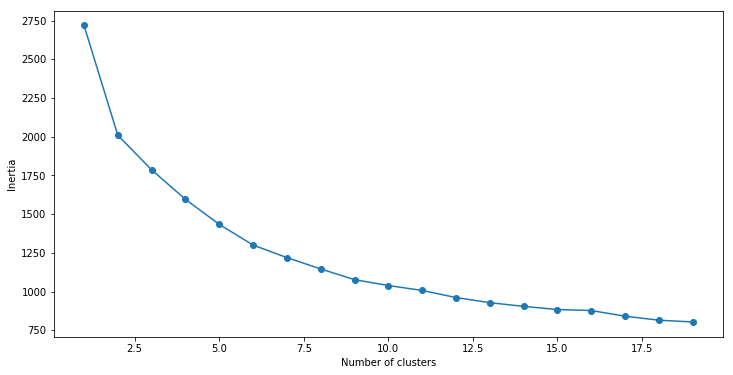

In [83]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs=-1, n_clusters = cluster, init='random') 
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [114]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
cluster = kmeans.predict(X)

In [115]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(X, cluster)}')

Silhouette Score: 0.18219634890556335


In [96]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
data['x'] = pca_result[:, 0]
data['y'] = pca_result[:, 1]

In [97]:
cluster_colors = pd.np.array(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
data['color'] = cluster_colors[cluster]
data['Clustering'] = data.conten_sastrawis.str[:150]

In [98]:
import bokeh.io
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet

# from bokeh.charts import Donut, HeatMap, Histogram, Line, Scatter, show, output_notebook, output_file
bokeh.io.output_notebook()

Loading BokehJS ...

In [99]:
#visualize the data using bokeh
#output_file("top_artists.html", title="top artists")
# TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,previewsave"

source = ColumnDataSource.from_df(data[['x', 'y', 'color', 'Clustering']])
# TOOLTIPS = [("Clustering", "@Clustering")]
TOOLS = ("pan,wheel_zoom,box_zoom,reset,hover,previewsave")

plot = figure(plot_width=800, plot_height=450, tools=TOOLS)

#draw circles
plot.circle(y='y', x='x', source=source, size=15, fill_color='color')
show(plot)

In [61]:
data.head()

,content,tags,title,conten_sastrawi,conten_sastrawis,vectors,x,y,color,Clustering
0,kapten supardi nasir berharap kompetisi liga s...,"persib bandung,persib,supardi nasir,liga",kapten persib bandung harapkan liga kembali be...,"['kapten', 'supardi', 'nasir', 'harap', 'kompe...",kapten supardi nasir harap kompetisi liga lanj...,"[[0.09751768, 0.40313125, 0.13385952, 0.044698...",-0.156877,0.222299,#ffe119,kapten supardi nasir harap kompetisi liga lanj...
1,?borussia moenchengladbach menyodok ke peringk...,"bundesliga,borussia moenchengladbach,liga jerman","bundesliga, borussia moenchengladbach naik ke ...","['borussia', 'moenchengladbach', 'sodok', 'per...",borussia moenchengladbach sodok peringkat tiga...,"[[0.059043936, 0.32034856, 0.09002547, 0.02098...",0.746671,0.014038,#3cb44b,borussia moenchengladbach sodok peringkat tiga...
2,"?gelandang incaran , saul niguez, memberi siny...","manchester united,saul niguez,atletico madrid,...","saul beri sinyal tinggalkan atletico, ke manch...","['gelandang', 'incar', '', 'saul', 'niguez', '...",gelandang incar saul niguez sinyal hengkang a...,"[[0.08996588, 0.33748645, 0.10084185, 0.017426...",0.421105,0.010523,#3cb44b,gelandang incar saul niguez sinyal hengkang a...
3,"?joshua denson, seorang dokter, mengungkap pen...","paru-paru,corona,covid-,sars-cov-,protein ace","tak cuma di paru-paru, ini gejala virus corona...","['joshua', 'denson', 'dokter', 'ungkap', 'alam...",joshua denson dokter ungkap alam periksa kondi...,"[[0.15893267, 0.3723663, 0.14858934, -0.026058...",-0.137122,-0.254269,#ffe119,joshua denson dokter ungkap alam periksa kondi...
4,sebanyak lokasi di jakarta disemprot cairan se...,"disinfektan,damkar ,corona","cegah corona, lokasi di jakarta disemprot disi...","['lokasi', 'jakarta', 'semprot', 'cair', 'sere...",lokasi jakarta semprot cair serentak tugas mad...,"[[-0.019723104, 0.32359803, 0.27372324, 0.0605...",-0.685764,0.357116,#e6194b,lokasi jakarta semprot cair serentak tugas mad...
